# Formalia:

Please read the [assignment overview page](https://github.com/lalessan/comsocsci2022/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on March 1st at 23:55. Hand in your Jupyter notebook file (with extension `.ipynb`) via DTU Learn _(Course Content, Assignemnts, Assignment 1)_. 

Remember to include in the first cell of your notebook:
* the link to your group's Git repository
* group members' contributions

# Part 1: Datasets for Computational Social Science

_Ten characteristics of Big Data._ Consider the dataset you have collected in Week 1, and think of the *10 characteristics of Big Data* from the book [Bit by Bit section 2.3](https://www.bitbybitbook.com/en/1st-ed/observing-behavior/characteristics/).
> * **Big**. How large is this data (approximately)? Could you collect the same amount of information via surveys?
> * **Always-on**. Can you keep collecting data over time?
> * **Non-reactive**. Is the dataset non-reactive?
> * **Incomplete**. Do you think the dataset captures entirely the unfolding of events leading to the GME stock rise in price? 
> * **Inaccessible**. Is the data accessible? 
> * **Non-representative**. Do you think that the conclusions we will draw by analyzing this dataset are specific to the GME events? Or could they instead help us understand social phenomena more in general? If yes, which phenomena could you think of? Of not, what are the aspects that make this dataset non-representative?
> * **Drifting**. Is there any source of *drift* in this dataset (within the period observed)? 
> * **Algorithmically confounded**. Is the dataset algorithmically confounded? If yes, why?
> * **Dirty**. What aspect may make this dataset *dirty*?
> * **Sensitive**. Is there any sensitive information in the data?

# Part 2: activity on Reddit and GME prices



Consider the following datasets: 
 * the *GME market data*, that you can download from [here](https://finance.yahoo.com/quote/GME/history/). 
 * the dataset you downloaded in Week1, Exercise 2. We will refer to this as the _comments dataset_.

In [22]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [16]:
GME_market_data = pd.read_csv('GME.csv',parse_dates=['Date'],).set_index('Date')

In [55]:
comments_dataset = pd.read_csv('./data_comments/data_comments.csv')
comments_dataset['Date'] = comments_dataset['created_utc'].apply(lambda x: datetime.utcfromtimestamp(x + np.random.rand()))
comments_dataset.set_index('Date', inplace = True)
comments_dataset['num_comments'] = np.ones(len(comments_dataset))
comments_dataset_num = comments_dataset.resample('1D').sum()

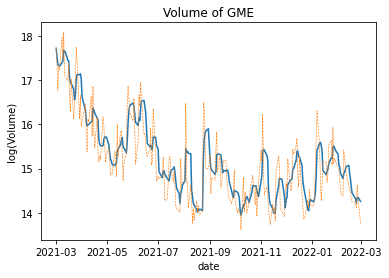

C:\Users\Bruger\.conda\envs\comsoc\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Bruger\.conda\envs\comsoc\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


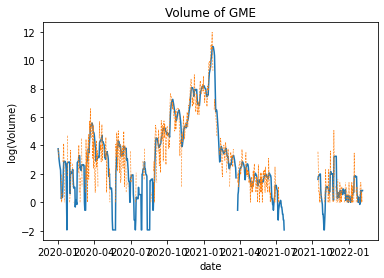

In [59]:
def plot_21(dataframe: pd.DataFrame, column, xlabel, ylabel, title):
    running_mean = dataframe.rolling(f'{60*60*24*7}s').mean()[column]
    plt.plot(running_mean.index, np.log(running_mean))
    plt.plot(dataframe.index, np.log(dataframe[column]),'--',linewidth = 0.6)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

plot_21(GME_market_data, 'Volume','date','log(Volume)','Volume of GME')
plot_21(comments_dataset_num, 'num_comments','date','log(Volume)','Volume of GME')

> _Part 2.1 : Plotting prices and comments using line-graphs._
> 1. Plot the daily volume of the GME stock over time using the _GME market data_. On top of the daily data, plot the rolling average, using a 7 days window (you can use the function [``pd.rolling``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)). Use a [log-scale on the y-axis](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html).
> 2. Now make a second plot where you plot the total number of comments on Reddit per day. Follow the same steps you followed in step 1.
> 3. What is the advantage of using the log-scale on the y-axis? What is the advantage of using a rolling-window?
> 3. Now take a minute to __look at these two figures__. Then write in a couple of lines: What are the three most important observations you can draw by looking at the figures?


> _Part 2.2: Returns vs number of comments using scatter-plots_.
> In this part of the assignment, we will look at the association between GME market indicators and the volume of comments on Reddit. 
> 1. Compute the daily log-returns as ``np.log(Close_price(t)/Close_price(t-1))``, where ``Close_price(t)`` is the Close Price of GME on day t. You can use the function [pd.Series.shift](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.shift.html). Working with log-returns instead of regular returns is a standard thing to do in economics, if you are interested in why, check out [this blog post](https://quantivity.wordpress.com/2011/02/21/why-log-returns/).
> 2. Compute the daily log-change in number of new comments as ``np.log(comments(t)/comments(t-1))`` where ``comments(t)`` is the number of comments on day t. 
> 3. Compute the correlation coefficient (find the formula in the Data Visualization book, section 12.2) between the series computed in step 1 and step 2 (note that you need to first remove days without any comments from the time-series). Is the correlation statistically significant? 
> 4. Make a [scatter plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) of the daily log-return on investment for the GME stock against the daily log-change in number of comments. Color the markers for 2020 and 2021 in different colors, and make the marker size proportional to the Close price. 
> 5. Now take a minute to __look at the figure you just prepared__. Then write in a couple of lines: What are the three most salient observations you can draw by looking at it? 
> 6. Based on the exploratory data visualization in Exercises 2 and 3, what can you conclude on the research question: *Is the activity on wallstreetbet related to the price of the GME stock?*


#  Part 3: Exercises using the `NetworkX` library

> Solve the following exercises from your [Network Science book](http://networksciencebook.com).
> * Go to Section 2.12: [Homework](http://networksciencebook.com/chapter/2#homework2), then
>     * Write the solution for exercise 2.1 (the 'Königsberg Problem') from NS in your notebook.
>     * Solve exercise 2.3 ('Graph representation') from NS using NetworkX in your notebook. (You don't have to solve the last sub-question about cycles of length 4).
>     * Solve exercise 2.5 ('Bipartite Networks') from NS using NetworkX in your notebook.

# Part 4: Properties of the real-world network of Redditors

For this part of the assignment, consider the directed network of redditors posting about GME on r/wallstreetbets in the period included between Jan 1st and Dec 31st, 2020 (the one you built in Week 3, Part 3).

> _Part 4.1 Random Network_: Create a Random Network as a null model to investigate some properties of the Redditors Network.
> * Compute the value of _p_ such that the number of expected edges of the random network equals the number of edges in the redditor network (see equation 3.2 in your Network Science Book). What is the value of p? Compute the average value of the degree < k > (using the formula).
> * Create a Random network with the same number of nodes as the redditor networks, and _p_ as computed above. Generate a random network by linking nodes in every possible pair with probability _p_.
> * Visualize the Redditors Network and the Random Network. Comment on the differences between the two.
>
> _Part 4.2 Clustering_: Compare the clustering coefficient in the Redditors Network and its random counterpart.
> * Compute the clustering coefficient for all nodes in the random network, using the formula 2.15 in your book.  
> * Compute the average clustering across nodes of the random network. Is it consistent with the analytical prediction (network science book equation 3.21)?
> * Compute the average clustering coefficient for the Redditors network. How does it compare to its random counterpart? Is it something you would expect? Why?